## Resources

https://www.openweathermap.org/api

Latitude and longitude parameters: api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}

Documentation: https://www.openweathermap.org/current

In [22]:
# dependencies
import matplotlib as plt
import requests
from config import api_key


url = "http://api.openweathermap.org/data/2.5/weather?" + "appid=" + api_key 

In [23]:
# parameters
city = "Paris"
units = "imperial"
lat: "34.052235"
lon: "-118.243683"

# url_param = url + "&q=" + city + "&units=" + units
# url_param_coor = url_param + "lat={" + lat + "}&lon={" + lon +"}"
# url_param_coor

In [24]:
# testing lon and lat
requests.get(url+"lat={34.052235}&lon={-118.243683}").json()

{'cod': 401,
 'message': 'Invalid API key. Please see http://openweathermap.org/faq#error401 for more info.'}

In [25]:
# testing lon and lat 2
requests.get("http://api.openweathermap.org/data/2.5/weather?" + "appid=" + api_key + "&lat=34.052235&lon=-118.243683").json()

{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 34.05, 'lon': -118.24},
 'dt': 1528574280,
 'id': 5368361,
 'main': {'humidity': 54,
  'pressure': 1013,
  'temp': 299.78,
  'temp_max': 305.15,
  'temp_min': 294.15},
 'name': 'Los Angeles',
 'sys': {'country': 'US',
  'id': 416,
  'message': 0.005,
  'sunrise': 1528548064,
  'sunset': 1528599838,
  'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'clear sky',
   'icon': '01d',
   'id': 800,
   'main': 'Clear'}],
 'wind': {'speed': 1.5}}

In [26]:
# testing "Cities within a rectangle zone"
requests.get("http://api.openweathermap.org/data/2.5/box/city?" + "appid=" + api_key + "bbox=" + "180,90,180,90").json()

{'cod': 401,
 'message': 'Invalid API key. Please see http://openweathermap.org/faq#error401 for more info.'}

In [20]:
!pip install citipy

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [27]:
city = citipy.nearest_city(33.8583, -118.0648)
city.city_name

NameError: name 'citipy' is not defined

In [101]:
print(json.dumps(requests.get(url + "&q=" + city.city_name + "&units=" + units).json(),indent=4,sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": -43.03,
        "lon": 147.26
    },
    "dt": 1528596000,
    "id": 2158744,
    "main": {
        "humidity": 66,
        "pressure": 1028,
        "temp": 51.8,
        "temp_max": 51.8,
        "temp_min": 51.8
    },
    "name": "Margate",
    "sys": {
        "country": "AU",
        "id": 8195,
        "message": 0.0033,
        "sunrise": 1528580295,
        "sunset": 1528612938,
        "type": 1
    },
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02d",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 320,
        "speed": 6.93
    }
}


In [134]:
requests.get(url + "&q=" + city.city_name + "&units=" + units).json()

{'cod': '404', 'message': 'city not found'}

In [139]:
requests.get(url + "&q=" + city.city_name + "&units=" + units).json()

{'cod': '404', 'message': 'city not found'}

In [203]:
# dependencies
import random
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
from citipy import citipy
from config import api_key

# init stuffs
rand_cities = []
url = "http://api.openweathermap.org/data/2.5/weather?" + "appid=" + api_key 
units = "imperial"

# created random lat & long func
def lat_random():
    # rand between 90
    return round(90*random.random()*random.uniform(-1,1),4)

def long_random():
    # random between 180
    return round(180*random.random()*random.uniform(-1,1),4)

In [204]:
for i in range(5):
    lat = lat_random()
    long = long_random()
    city = citipy.nearest_city(lat,long)
    max_temp = requests.get(url + "&q=" + city.city_name + "&units=" + units).json()["main"]["temp_max"]
    humidity = requests.get(url + "&q=" + city.city_name + "&units=" + units).json()["main"]["humidity"]
    cloudiness = requests.get(url + "&q=" + city.city_name + "&units=" + units).json()["clouds"]["all"]
    wind_speed = requests.get(url + "&q=" + city.city_name + "&units=" + units).json()["wind"]["speed"]
    url2 = requests.get(url + "&q=" + city.city_name + "&units=" + units).url
    rand_cities.append((lat,long,city.city_name,city.country_code, max_temp, humidity, cloudiness, wind_speed, url2))
    
# rand dataframe
weather_df = pd.DataFrame(rand_cities,columns=["latitude","longitude","city","country","max_temp","humidity","cloudiness","wind_speed","url"])
weather_df.head()

,latitude,longitude,city,country,max_temp,humidity,cloudiness,wind_speed,url
0,-16.3469,-3.1404,jamestown,sh,55.10,97,68,8.63,http://api.openweathermap.org/data/2.5/weather...
1,-16.7679,21.6025,shakawe,bw,40.97,61,0,2.82,http://api.openweathermap.org/data/2.5/weather...
2,-52.6378,18.4549,bredasdorp,za,51.80,81,68,5.82,http://api.openweathermap.org/data/2.5/weather...
3,-33.6900,-73.0429,san antonio,cl,51.80,87,90,5.82,http://api.openweathermap.org/data/2.5/weather...
4,-40.8783,-89.4279,ancud,cl,38.99,99,92,4.38,http://api.openweathermap.org/data/2.5/weather...


In [205]:
# to csv
weather_df.to_csv("reubens_weather_pull.csv", index=False,header=True)

In [206]:
# print log
print("------------------------------------------------------------------------------------------------")
print("Beginning Data Retrieval")
print("------------------------------------------------------------------------------------------------")

for i in range(len(weather_df)):
    print("City Number: " + str(i) + " of 500 | City Name: " + weather_df["city"].iloc[i] + "| \n URL:" + weather_df["url"].iloc[i])
    
print("------------------------------------------------------------------------------------------------")
print("End of Data Retrieval")
print("------------------------------------------------------------------------------------------------")

------------------------------------------------------------------------------------------------
Beginning Data Retrieval
------------------------------------------------------------------------------------------------
City Number: 0 of 500 | City Name: jamestown| 
 URL:http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=jamestown&units=imperial
City Number: 1 of 500 | City Name: shakawe| 
 URL:http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=shakawe&units=imperial
City Number: 2 of 500 | City Name: bredasdorp| 
 URL:http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=bredasdorp&units=imperial
City Number: 3 of 500 | City Name: san antonio| 
 URL:http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=san%20antonio&units=imperial
City Number: 4 of 500 | City Name: ancud| 
 URL:http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f15

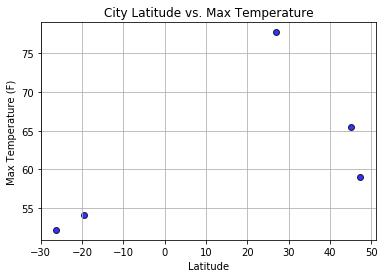

In [188]:
# City Latitude vs Max Temperature
plt.scatter(weather_df["latitude"],
            weather_df["max_temp"],
#             s=<var>, 
            c="blue",
            alpha=0.8, 
            edgecolors="Black")

plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
plt.savefig("lat_vs_temp.png")
plt.show()

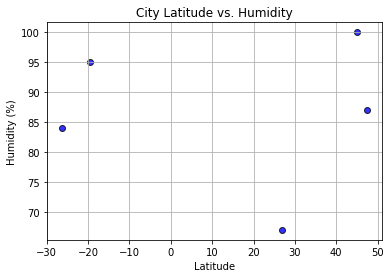

In [189]:
# City Latitude vs Humidity
plt.scatter(weather_df["latitude"],
            weather_df["humidity"],
#             s=<var>, 
            c="blue",
            alpha=0.8, 
            edgecolors="Black")

plt.title("lat_vs_humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.savefig("lat_vs_humidity.png")
plt.show()

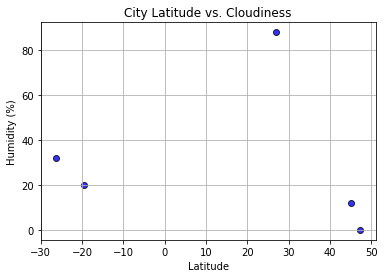

In [191]:
# City Latitude vs Cloudiness
plt.scatter(weather_df["latitude"],
            weather_df["cloudiness"],
#             s=<var>, 
            c="blue",
            alpha=0.8, 
            edgecolors="Black")

plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.savefig("lat_vs_cloudiness.png")
plt.show()

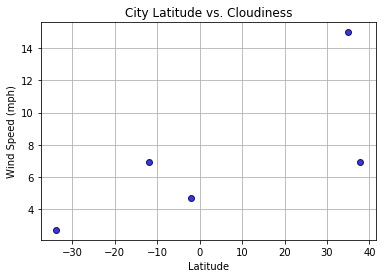

In [199]:
# City Latitude vs Wind Speed
plt.scatter(weather_df["latitude"],
            weather_df["wind_speed"],
#             s=<var>, 
            c="blue",
            alpha=0.8, 
            edgecolors="Black")

plt.title("City Latitude vs. Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.savefig("lat_vs_speed.png")
plt.show()